In [8]:
cd ../

/Users/me/Desktop/School/KaggleHackTheHuman_2022


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
ls

README.md                        ipynbs/
data/                            sample_submission.csv
hubmap-organ-segmentation.zip    test.csv
inference-fastai-baseline.ipynb  train.csv


In [11]:
training = pd.read_csv("train.csv")

In [47]:
test = pd.read_csv("test.csv")

In [20]:
training

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
0,10044,prostate,HPA,3000,3000,0.4,4,1459676 77 1462675 82 1465674 87 1468673 92 14...,37.0,Male
1,10274,prostate,HPA,3000,3000,0.4,4,715707 2 718705 8 721703 11 724701 18 727692 3...,76.0,Male
2,10392,spleen,HPA,3000,3000,0.4,4,1228631 20 1231629 24 1234624 40 1237623 47 12...,82.0,Male
3,10488,lung,HPA,3000,3000,0.4,4,3446519 15 3449517 17 3452514 20 3455510 24 34...,78.0,Male
4,10610,spleen,HPA,3000,3000,0.4,4,478925 68 481909 87 484893 105 487863 154 4908...,21.0,Female
...,...,...,...,...,...,...,...,...,...,...
346,9517,kidney,HPA,3000,3000,0.4,4,1611763 11 1614753 29 1617750 35 1620746 43 16...,61.0,Male
347,9769,kidney,HPA,3070,3070,0.4,4,4030400 28 4033466 34 4036526 48 4039594 54 40...,28.0,Male
348,9777,largeintestine,HPA,3000,3000,0.4,4,538473 13 541468 22 544463 30 547461 35 550459...,84.0,Male
349,9791,kidney,HPA,3000,3000,0.4,4,334733 33 337729 43 340729 43 343725 51 346723...,28.0,Male


In [19]:
training.describe

<bound method NDFrame.describe of         id           organ data_source  img_height  img_width  pixel_size  \
0    10044        prostate         HPA        3000       3000         0.4   
1    10274        prostate         HPA        3000       3000         0.4   
2    10392          spleen         HPA        3000       3000         0.4   
3    10488            lung         HPA        3000       3000         0.4   
4    10610          spleen         HPA        3000       3000         0.4   
..     ...             ...         ...         ...        ...         ...   
346   9517          kidney         HPA        3000       3000         0.4   
347   9769          kidney         HPA        3070       3070         0.4   
348   9777  largeintestine         HPA        3000       3000         0.4   
349   9791          kidney         HPA        3000       3000         0.4   
350   9904  largeintestine         HPA        3000       3000         0.4   

     tissue_thickness                    

In [16]:
training.shape

(351, 10)

In [32]:
training

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
0,10044,prostate,HPA,3000,3000,0.4,4,1459676 77 1462675 82 1465674 87 1468673 92 14...,37.0,Male
1,10274,prostate,HPA,3000,3000,0.4,4,715707 2 718705 8 721703 11 724701 18 727692 3...,76.0,Male
2,10392,spleen,HPA,3000,3000,0.4,4,1228631 20 1231629 24 1234624 40 1237623 47 12...,82.0,Male
3,10488,lung,HPA,3000,3000,0.4,4,3446519 15 3449517 17 3452514 20 3455510 24 34...,78.0,Male
4,10610,spleen,HPA,3000,3000,0.4,4,478925 68 481909 87 484893 105 487863 154 4908...,21.0,Female
...,...,...,...,...,...,...,...,...,...,...
346,9517,kidney,HPA,3000,3000,0.4,4,1611763 11 1614753 29 1617750 35 1620746 43 16...,61.0,Male
347,9769,kidney,HPA,3070,3070,0.4,4,4030400 28 4033466 34 4036526 48 4039594 54 40...,28.0,Male
348,9777,largeintestine,HPA,3000,3000,0.4,4,538473 13 541468 22 544463 30 547461 35 550459...,84.0,Male
349,9791,kidney,HPA,3000,3000,0.4,4,334733 33 337729 43 340729 43 343725 51 346723...,28.0,Male


In [49]:
3000 * 3000

9000000

In [57]:
training["rle"][300][-25:]

' 50 8422377 47 8425383 34'

In [31]:
training["id"]

0      10044
1      10274
2      10392
3      10488
4      10610
       ...  
346     9517
347     9769
348     9777
349     9791
350     9904
Name: id, Length: 351, dtype: int64

In [37]:
training["organ"].describe()

count        351
unique         5
top       kidney
freq          99
Name: organ, dtype: object

In [39]:
training["organ"] = training["organ"].astype("category")

In [44]:
training["organ"].describe()

count        351
unique         5
top       kidney
freq          99
Name: organ, dtype: object

(array([93.,  0., 53.,  0.,  0., 48.,  0., 99.,  0., 58.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

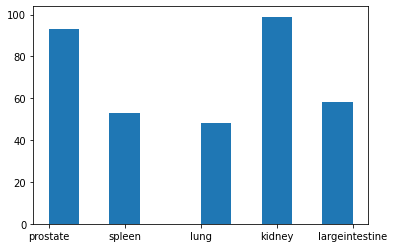

In [43]:
plt.hist(list(training["organ"]))

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

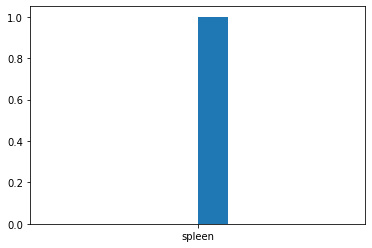

In [48]:
plt.hist(list(test["organ"]))

(array([13., 12., 10., 23., 28., 64., 72., 31., 39., 59.]),
 array([21. , 27.3, 33.6, 39.9, 46.2, 52.5, 58.8, 65.1, 71.4, 77.7, 84. ]),
 <BarContainer object of 10 artists>)

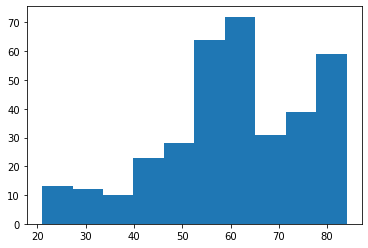

In [45]:
plt.hist(list(training["age"]))

(array([229.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 122.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

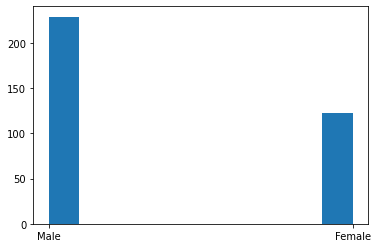

In [46]:
plt.hist(list(training["sex"]))

In [33]:
print("n = " + str(training.shape[0]))
print(sum(training["pixel_size"] == 0.4))
print(sum(training["img_height"] == 3000))
print(sum(training["img_width"] == 3000))
print(sum(training["tissue_thickness"] == 4))
print(sum(training["data_source"] == "HPA"))
print

n = 351
351
326
326
351
351
